# Can Online Platforms Benefit from Hosting Collective Action? Estimating the Amount of Reddit Activity Attributable to r/wallstreetbets in January 2021
## Nicholas Vincent and Hanlin Li, Northwestern University
### Last updated Feb 8, 2020

## Preface and TLDR
*Preface/caveat: This is a rough draft/work-in-progress notebook, intended as an early
contribution to discussions around r/wallstreetbets GameStop short squeeze and resulting implications
for social computing. We are open to all sorts of critiques and suggestions
regarding the framing, assumptions, and methods choices. The first author takes
all responsibility for errors in code or claims*.

*Summary/TLDR: using a sample of reddit submissions (sampled by collecting all submissions for a
random set of one minute time windows) to calculate standard 99% confidence intervals,
we estimate that r/wallstreetbets was responsible for
1.52% to 1.57% of all Reddit posts, 0.55% to 3.04% of all comments, and 0.58% to 1.51% of
total "post scores" in January 2021.
Much of this activity occurred in a at the end of the month. 
These estimates suggest that platforms like reddit may have a
powerful incentive to support future instances of "collective action" that are similar to
the "r/wallstreetbets short squeeze".*


## Motivation
The beginning of the [2021 GameStop short squeeze](https://en.wikipedia.org/wiki/GameStop_short_squeeze)
has been attributed to users of the subreddit r/wallstreetbets. 
For brevity, we'll refer to this (ongoing) event as the "WSB squeeze".
While it is a challenging task to prove exactly how responsible subreddit members were for ensuing market movement,
media coverage suggests that (1) the subreddit had a major influence on the WSB short squeeze and
(2) the subreddit recevied massive activity during this period.

Several articles in the media suggest measurable changes in reddit activity. 
Morse, writing for Mashable, reported that wallstreetbets was responsible for
record breaking
[massive traffic](https://mashable.com/article/reddit-wallstreetbets-subreddit-record-traffic-gamestop/)
(73M views in 24 hours).
Ghost, writing for Business Insider, summarized evidence from
[FrontPage Metrics](https://frontpagemetrics.com/) regarding
r/wallstreetbet's
[massive gain in userbase](https://www.businessinsider.com/wallstreetbets-fastest-growing-subreddit-hits-58-million-users-2021-1).
Several round-up posts [(example)](https://old.reddit.com/r/theoryofwsb/comments/l8uom9/press_roundup_through_30_january_2021/)
on old.reddit.com/r/theoryofwsb highlight the enormous amount of media attention the WSB squeeze received.

Building on the massive interest in the WSB squeeze, in this notebook, we will attempt to use a sample of reddit submissions to estimate the total
number of posts, comments, and upvotes attributable to r/wallstreetbets in January 2021.


## Contributions
Our intended primary contribution is to estimate, in a fast and easy-to-replicate manner,
reddit the amount of activity from a a particular subreddit relative to all reddit activity.
Specifically, we ask "How many posts, comments, and upvotes did r/wallstreetbets users contribute in Jan 2021", and
how do these figures compare to overall levels of reddit activity?

We argue that these estimates provide insight into how much online platforms like
reddit stand to benefit from being the "host" of attention grabbing collective efforts like
the WSB squeeze.
[reddit itself](https://redditblog.com/2020/12/08/reddits-2020-year-in-review/) uses submissions and comments
as measurements of overall activity,
and it seems likely that these activity measurements correlate with ad revenue (though
as we will discuss below, unusual events like the short squeeze may challenge this assumption).

That is, we are motivated the idea that regardless of the nth-order effects of
an instance of collective action, platforms stand to benefit from any overall
increase in engagement, and measuring this engagement. This motivation
draws on work
that seeks to make invisible labor of data generation visible
(see e.g. [data feminism](https://data-feminism.mitpress.mit.edu/) and [data leverage](https://arxiv.org/abs/2012.09995)).

Our secondary contribution is to explore the use of "time window" sampling of reddit submissions.
Specfically, because of the large amount of activity on Reddit
(e.g. around 30M submissions per month in 2020),
it can be challenging to *quickly* measure something like
the number of total posts on reddit during a period of heavy activity.
While pushshift.io provides complete data dumps for historical reddit data,
very recent data can only be accessed via API (which is understandably rate limited). 
Exactly measuring number of posts (or number of comments, or average post score),
requires downloading every reddit post via API calls, creating
a large time cost in terms of API calls (for both the researcher and the API provider, i.e. pushshift).
For instance, assuming an API call takes 1.1 second (1 second of sleep and 0.1 seconds of computation),
and each call retrieves 100 posts or comments (the current pushshift max),
in 86,400 seconds (a day), a researcher can retrieve only 7,864,500 items per day.
As we will see below, as of 2020, a month
of reddit data can have around 30M posts and even more comments.
Furthermore, capturing full data uses a large amount of disk space (which may be fine for well resourced researchers, but makes it harder
for interested parties to replicate).

All this goes to say, we believe there is value in exploring sampling techniques to answer these
kinds of questions.


## Time Window Sampling
We propose the following sampling approach:

1) divide January 2021 into one minute windows, starting at 00:00 UTC on Jan 1.

2) randomly select x% of these windows.

3) collect *all* reddit posts within each selected window using the pushshift API. 
We then get each post's updated "score" (upvotes minus downvotes) and number of comments
via [PRAW](https://praw.readthedocs.io/en/latest/).

4) treat this 1% sample as a "simple random sample" to produce parameter estimates for the entire month of January

Thanks to Nate TeBlunthias for several helpful observations regarding this approach.
* It may useful to compare this approach to sampling techniques in ecology intended to estimate the population of a species.
For instance, ecologists may use [quadrats](https://en.wikipedia.org/wiki/Quadrat) to collect a `rectangle` of data.
The time window approach is a 1-d version of this.
* This approach could be viewed as a case of the [law of total expectation](https://en.wikipedia.org/wiki/Law_of_total_expectation).
The variable $x$ being our measures of interest (post score, post comment count, total posts), and the conditioning variable $y$ referring the time window in
which a post appears.


We are very interested in collecting more critiques of this approach!
The exact sampling code is in `collect-wsb.ipynb`.

Some open questions:
* should the time windows actually be extended by something like 0.001 seconds
(i.e. does the current version excluded posts made at exact minute intervals?)
* What is the ideal window size for a given sample fraction (we're trying out some simulations to answer this).

Note, we are currently working on (1) describing the approach more formally and
(2) assessing the accuracy of this approach. See the end of this cell, the `sampling_accuracy.ipynb` notebok
for more, and the `jan2020_simulations.ipynb` for more.


## Activity Measures

Returning to the main goals of this notebook, we aim to help answer the following broad question:

When a community organizes collective action similar to the r/wallstreetbets short squeeze,
*how much* does a platform like reddit benefit from the associated activities?
Should platforms like reddit implement design features specifically
to encourage such collective action, and if so what are the potential consequences?

Practically speaking, we focus on three measurements of reddit activity:

1) How many submissions were made to r/wallstreetbets in Jan 2021? 

2) What fraction of all reddit comments were posted to r/wallstreetbets in Jan 2021?

3) What fraction of "post score"
(which we argue is a correlate of pageviews, and thereby ad revenue) is attributable to WSB?

Looking at each of these estimates, we contextualize them using the submissions, comments, and post score from
other subreddits. In other words, we consider r/wallstreetbets activity relative to the rest of reddit.

Summary of answers (see below for the actual code!)

1) 535k submissions.
2) 0.74-1.21%
3) 0.42-1.17%

## How accurate is this sampling approach?
On Feb 8, kaggle user mattpodolak shared a dataset of [all r/wallstreetbets posts from Dec 6 2020 to Feb 6 2021](https://old.reddit.com/r/datasets/comments/lfbddy/all_available_posts_and_comments_from/).
This dataset provides an excellent opportunity to evaluate how closely our 1% time window sampling 
estimates match the actual population parameters *for r/wallstreetbets-specific estimates*
(we still need to collect every reddit post to calculate population parameters for all subreddits).
In the future, we hope to also look at how accuracy varies with sample size
(we expect there may be some challenges regarding the very long tail nature of reddit post scores, # comments, etc.)

For now, we've started looking into accuracy in a separate notebook,
`sampling_accuracy.ipynb`.

Summary of where this stands: while our approach seems fairly accurate for estimate the total number of
r/wallstreetbets posts, our sampling approach underestimates average post scores and number of comments.




In [1]:
import pandas as pd
import glob
from datetime import datetime
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint
import time
import numpy as np



%precision %.4f
pd.options.display.float_format = '{:,.4f}'.format

We'll use data in `data/start=2021-01-01_00:00:00_end=2021-02-01_00:00:00_n=446_seed=0`

This directory corresponds to a 5% sample of 1-minute windows 
starting at 2021-01-01_00:00:00 and ending at
2021-02-01_00:00:00. 

In total, we collected all submissions from 2232 such 1-minute windows, and
2170 returned data (implying that 52 were empty or ran into data collection errors; 
it's worth double checking for any bias from this).

In [2]:
start_ts = '2021-01-01_00:00:00'
end_ts = '2021-02-01_00:00:00'
n_windows = 2232
seed = 0
folder = f'start={start_ts}_end={end_ts}_n={n_windows}_seed={seed}'
files = glob.glob(f'/datasets/bucket/{folder}/praw/prawsubmission_*')

frac = 0.05
coef = 1 / frac
frac, coef

(0.0500, 20.0000)

In [3]:
print(f'num windows: {n_windows}, num_files: {len(files)}, num missing or empty: {n_windows - len(files)}')

num windows: 2232, num_files: 2170, num missing or empty: 62


In [4]:
t1 = time.time()
cols_of_interest = ['subreddit', 'created_utc', 'praw_score', 'praw_num_comments']
dfs = []
for i, f in enumerate(files):
    
    df = pd.read_csv(f)[cols_of_interest]
    dfs.append(df)
    # scores = np.append(scores, tmp.praw_score.values)
    # num_comments = np.append(scores, tmp.praw_num_comments.values)
    if i % 1000 == 0:
        print(i, 'files')
        print(time.time() - t1 , 'seconds since start')
df = pd.concat(dfs)
tic = time.time() - t1
tic

0 files
0.20862078666687012 seconds since start
1000 files
143.81515908241272 seconds since start
2000 files
441.750061750412 seconds since start


544.4568

In [5]:
submissions = pd.concat(dfs)
len(submissions)

1583926

Create some helpful date and time related columns:

In [6]:
submissions['dt'] = submissions.created_utc.apply(datetime.fromtimestamp)
submissions['date'] = submissions['dt'].apply(datetime.date)
submissions['weekday'] = submissions['dt'].dt.weekday
submissions['day'] = submissions['dt'].dt.day

Now, let's look at some relevant descriptive stats.

* we look at the subreddits with the most posts in our sample
* we look at descriptive stats for post score and number of comments
* we look at how our posts are distributed over dates

In [7]:
submissions.subreddit.value_counts()[:20] / frac

wallstreetbets       489,900.0000
HotMarthabullles     452,560.0000
AskReddit            346,100.0000
memes                267,680.0000
u_toronto_news       207,540.0000
teenagers            128,680.0000
InspirobotBot        124,540.0000
dirtykikpals         107,720.0000
dogecoin             101,440.0000
GaySnapchat           98,500.0000
AutoNewspaper         97,160.0000
FreeKarma4U           83,840.0000
onlyfansgirls101      80,580.0000
PokemonGoFriends      79,980.0000
OnlyFansPromotions    79,260.0000
dankmemes             78,660.0000
DiscordNudes          76,100.0000
gonewild              74,760.0000
ksi                   73,500.0000
dirtypenpals          71,740.0000
Name: subreddit, dtype: float64

In [8]:
submissions[['praw_num_comments', 'praw_score']].describe()

,praw_num_comments,praw_score
count,"1,514,299.0000","1,514,299.0000"
mean,5.8051,76.8122
std,95.3845,"1,215.4948"
min,0.0000,0.0000
25%,0.0000,1.0000
50%,1.0000,2.0000
75%,3.0000,10.0000
max,"49,759.0000","200,311.0000"


How many posts per day?

In [9]:
posts_by_day = submissions.groupby('day').praw_score.count().sort_index(ascending=False).rename(index='count')

<AxesSubplot:xlabel='day', ylabel='count'>

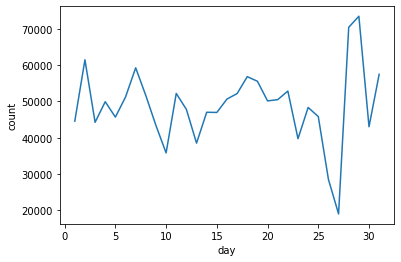

In [10]:
sns.lineplot(data=posts_by_day)

Smell test: Is the number of posts in our sample reasonable relative to the numbers from the [2020 official reddit year in review]
(https://redditblog.com/2020/12/08/reddits-2020-year-in-review/), which suggests in 2020 Reddit recevied
303.4M submissions over 310 days (Jan 1 to Nov 6).

This should give us somewhere around 978k posts per day, or 30.318M posts in a 31-day month.

In [11]:
n_dates = len(set(submissions.date))
n = len(submissions)
print('Posts / days')
print(n / n_dates / frac)
print(f'Given this is a {frac} sample, our estimate for total posts in Jan 2021 is')
print(n / frac / 1e6, 'M')

Posts / days
1021887.7419354839
Given this is a 0.05 sample, our estimate for total posts in Jan 2021 is
31.67852 M


Yes, the total number of posts in the sample seems plausible given the figures reported by reddit in 2020.



Next we will look at

1) all posts

2) posts from r/wallstreetbets

and calculate the mean, standard error, and 95% confidence interval for 
* score per post
* number of comments per post.

Then, we will calculate 
* a 95% confidence interval for the proportion of reddit posts from r/wallstreetbets
* estimated total number of posts from r/wallstreetbets.

In [12]:
# create a df with just r/wallstreetbets submissions
wsb = submissions[submissions.subreddit == 'wallstreetbets']
n_wsb = len(wsb)

In [13]:
# some useful reference points:
print('total posts: {}, total score: {}, total comments: {}'.format(
    n,
    submissions.praw_score.sum(),
    submissions.praw_num_comments.sum()
))

total posts: 1583926, total score: 116316679.0, total comments: 8790629.0


In [14]:
# from bootstrapped import bootstrap as bs
# from bootstrapped import stats_functions as bs_stats
# print(bs.bootstrap(df.praw_score.values, stat_func=bs_stats.mean))

In [15]:
# average post score and standard error for WSB posts
def stat_helper(name, df, full, cols):
    for col in cols:
        mean = df[col].mean()
        sem = df[col].sem()
        total = full[col].sum()
        print(name, col)
        print('mean is {:.2f} and corresponding standard error is {:.2f}'.format(
            mean, sem
        ))
        ci_lo = mean-2.58*sem
        ci_hi = mean+2.58*sem
        print('99% CI: {:.2f}, {:.2f}'.format(
            ci_lo, ci_hi 
        ))
        print('In terms of percent of the Jan 2021 sum, mean: {:.2f} sem: {:.2f}, ci: {:.2f}, {:.2f}'.format(
            mean*len(df)/total*100, sem*len(df)/total*100, ci_lo*len(df)/total * 100, ci_hi*len(df)/total*100
        ))
        print()
stat_helper('All Submissions', submissions, submissions, ['praw_score', 'praw_num_comments'])
stat_helper('r/wallstreetbets Submissions', wsb, submissions, ['praw_score', 'praw_num_comments'])


All Submissions praw_score
mean is 76.81 and corresponding standard error is 0.99
99% CI: 74.26, 79.36
In terms of percent of the Jan 2021 sum, mean: 104.60 sem: 1.35, ci: 101.13, 108.07

All Submissions praw_num_comments
mean is 5.81 and corresponding standard error is 0.08
99% CI: 5.61, 6.01
In terms of percent of the Jan 2021 sum, mean: 104.60 sem: 1.40, ci: 100.99, 108.20

r/wallstreetbets Submissions praw_score
mean is 49.39 and corresponding standard error is 8.56
99% CI: 27.31, 71.47
In terms of percent of the Jan 2021 sum, mean: 1.04 sem: 0.18, ci: 0.58, 1.51

r/wallstreetbets Submissions praw_num_comments
mean is 6.44 and corresponding standard error is 1.74
99% CI: 1.96, 10.93
In terms of percent of the Jan 2021 sum, mean: 1.80 sem: 0.48, ci: 0.55, 3.04



In [53]:
print('r/wallstreets has {:.2f} submissions in our sample and makes up {:.2f} percent of the sample'.format(
    n_wsb, n_wsb / len(submissions)*100
))
print('Because this is a {} sample, we estimate that r/wallstreetbets had {:.2f} of {:.2f} total submissions.'.format(
    frac, n_wsb/frac, n/frac
))
ci_low, ci_upp = proportion_confint(n_wsb, n, alpha=0.01, method='normal')
print('95% CI for proportion: {:.2f}, {:.2f}'.format(ci_low*100, ci_upp*100))
print('95% CI as count: {:.2f}, {:.2f}'.format(ci_low*n/frac, ci_upp*n/frac))

r/wallstreets has 24495.00 submissions in our sample and makes up 1.55 percent of the sample
Because this is a 0.05 sample, we estimate that r/wallstreetbets had 489900.00 of 31678520.00 total submissions.
95% CI for proportion: 1.52, 1.57
95% CI as count: 481899.79, 497900.21


What are the subreddits with the most submissions, post score, and number of comments?

Let's look at the top ten for each.

First, top subreddits by summed post score from our sample. Below values show
each subreddit's percent of total Jan 2021 post score.

In [19]:
submissions.groupby('subreddit').praw_score.sum().sort_values(ascending=False)[:10] * 100 / submissions.praw_score.sum()

subreddit
memes                8.3441
politics             3.1312
aww                  2.4096
dankmemes            1.7016
nextfuckinglevel     1.4052
funny                1.1927
interestingasfuck    1.0922
wallstreetbets       1.0401
WhitePeopleTwitter   0.9459
cursedcomments       0.8887
Name: praw_score, dtype: float64

Next, top subreddit by total number of comments in our sample. Similarly, the values below show
each subreddit's percent of (estimated) total Jan 2021 comments. 

In [20]:
submissions.groupby('subreddit').praw_num_comments.sum().sort_values(ascending=False)[:10] * 100 / submissions.praw_num_comments.sum()

subreddit
AskReddit        3.2250
politics         2.3325
wallstreetbets   1.7955
memes            1.2726
nfl              1.2286
neoliberal       0.7669
teenagers        0.7349
RedditSessions   0.6374
PublicFreakout   0.5222
nba              0.5205
Name: praw_num_comments, dtype: float64

Finally, top subreddits by total number of posts in our sample (again, as percent of Jan 2021).

In [21]:
submissions.groupby('subreddit').praw_num_comments.count().sort_values(ascending=False)[:10].rename(index='count') * 100 / submissions.praw_num_comments.count()

subreddit
wallstreetbets   1.6176
AskReddit        1.1428
memes            0.8838
u_toronto_news   0.6853
teenagers        0.4249
InspirobotBot    0.4112
dirtykikpals     0.3557
dogecoin         0.3349
GaySnapchat      0.3252
AutoNewspaper    0.3208
Name: count, dtype: float64

Putting it all together, showing total post *counts* alongside score and comment *percents*.

In [22]:
counts = submissions.groupby('subreddit').praw_score.count() / frac
counts.rename(index='count', inplace=True)
scores = submissions.groupby('subreddit').praw_score.sum() / submissions.praw_score.sum() * 100
comments = submissions.groupby('subreddit').praw_num_comments.sum() / submissions.praw_num_comments.sum() * 100
merged = pd.concat([counts, scores, comments], axis=1)
merged.sort_values('praw_score', ascending=False)[:20]

,count,praw_score,praw_num_comments
subreddit,,,
memes,"267,680.0000",8.3441,1.2726
politics,"51,000.0000",3.1312,2.3325
aww,"65,620.0000",2.4096,0.3615
dankmemes,"78,660.0000",1.7016,0.3119
nextfuckinglevel,"10,560.0000",1.4052,0.3291
funny,"50,020.0000",1.1927,0.3827
interestingasfuck,"13,040.0000",1.0922,0.3058
wallstreetbets,"489,900.0000",1.0401,1.7955
WhitePeopleTwitter,"9,860.0000",0.9459,0.1959


So far, these results seem to suggest that during the period of "collective action"
r/wallstreet indeed received a huge amount of posts, comments,
and votes which made it one of the most active subreddits. However
r/wallstreetbets did not completely dominate activity metrics.

One puzzle is how these estimates relate to the claims from the above Mashable article about record
breaking pageviews. It could be that for this unusual, attention-grabbing action,
it may be that post score is not a good correlate for pageviews.

In other words, r/wallstreetbets may have received an unusually large amount of 
viewership, some of which did not create visible engagement.

Another way to unpack this data could be to ask, "What would Jan 2021 reddit activity totals have looked like without 
r/wallstreetbets"?

In [43]:
# total_posts_without_wsb = submissions.praw_score.count() - wsb.praw_score.count()
# perinc_posts_from_wsb = wsb.praw_score.count() / total_posts_without_wsb * 100
# total_posts_without_wsb, perinc_posts_from_wsb

In [52]:
wsb.praw_score.sum()

1209842.0

In [44]:
total_score_without_wsb = submissions.praw_score.sum() - wsb.praw_score.sum()
perinc_score_from_wsb = wsb.praw_score.sum() / total_score_without_wsb * 100
total_score_without_wsb, perinc_score_from_wsb

(115106837.0, 1.0510600686560434)

In [45]:
total_comments_without_wsb = submissions.praw_num_comments.sum() - wsb.praw_num_comments.sum()
perinc_comments_from_wsb = wsb.praw_num_comments.sum() / total_comments_without_wsb * 100
total_comments_without_wsb, perinc_comments_from_wsb

(8632790.0, 1.8283660323024191)

Now for some napkin math / speculation.

Let's assume for January 2021, reddit expected \$9.91M in revenue
(conservatively drawing on [emarketer.com's \$119M per year estimate from 2019](https://www.emarketer.com/content/reddit-to-cross-100-million-in-ad-revenues-in-2019)).

Let's make the (large) simplifying assumption that ad revenue
scales with total post score 
(assuming post score correlates with page views,
an assumption for which there is [some evidence](https://ojs.aaai.org/index.php/ICWSM/article/view/14700)).

In other words, we'll assume the total engagement without r/wallstreetbets generated \$9.91M
(a conservative underestimated given revenue has increased since 2019), and
that each point of engagement (measured in posts, comments, or score) provided additional, linearly scaling revenue.

Using post score as the main proxy of revenue, r/wallstreetbets would
"proved" an increase in revenue of \$103k (see below cell). 

If we were to use comment count instead
of post score as a single proxy of revenue, this figure would be \$178k.

Of course, these figures do not account for ongoing activity (i.e. whatever happens in February)
or the long term effects of gaining completely new users.

While very assumption-reliant, these are nonetheless useful ballpark figures for thinking about the
incentives for platforms to scafflod and "encourage" collective action similar to this event.

In other words, these conservative "back of the napkin" estimates at least provide 
some evidence that collective action on the scale of the WSB short squeeze is
can be at least a "six figure big deal" in terms of ad revenue (even if six figures is still just 
a small fraction of total revenue).


In [37]:
ONE_MONTH_REVENUE_UNDERESTIMATE = 9.91e6 

In [38]:
est_rev_using_score = ONE_MONTH_REVENUE_UNDERESTIMATE / total_score_without_wsb * wsb.praw_score.sum()
est_rev_using_comment_count = ONE_MONTH_REVENUE_UNDERESTIMATE / submissions.praw_num_comments.sum() * wsb.praw_num_comments.sum()

In [47]:
print('Using score: ${:.2f}, Using comments: ${:.2f}'.format(est_rev_using_score, est_rev_using_comment_count))

Using score: $104160.05, Using comments: $177937.72


# Some additional interesting plots
* WSB metrics over time
* ...more to come?

Text(0.5, 1.0, 'WSB # Posts')

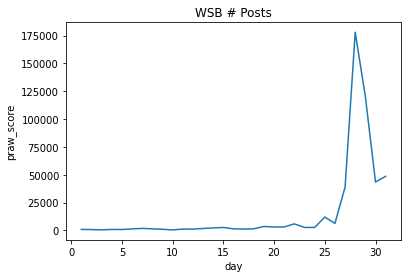

In [49]:
ax = sns.lineplot(data=wsb.groupby('day').praw_score.count()/frac)
ax.set_title('WSB # Posts')

Text(0.5, 1.0, 'WSB Summed Scores')

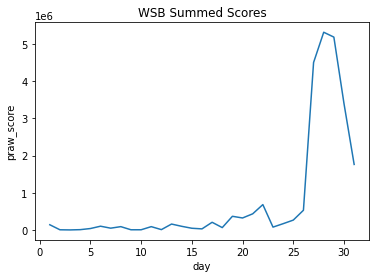

In [50]:
ax = sns.lineplot(data=wsb.groupby('day').praw_score.sum()/frac)
ax.set_title('WSB Summed Scores')

Text(0.5, 1.0, 'WSB # Comments')

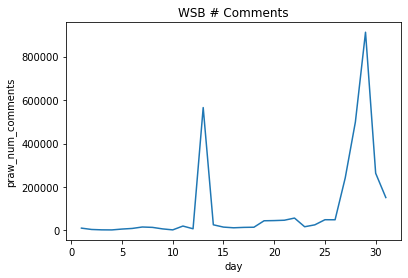

In [51]:
ax = sns.lineplot(data=wsb.groupby('day').praw_num_comments.sum()/frac)
ax.set_title('WSB # Comments')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9d8dd8e7-abf2-4721-84cd-03779d208ef5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>